In [15]:
import math
%matplotlib inline
#b
def Dynamics(t,y):
    return 0.25*math.cos(2*t)*math.exp(t/2)-math.sin(2*t)*math.exp(t/2) +4

def ExactVal(t,y0,t0):
    if t == t0:
        return y0
    return 0.5*math.cos(2*t)*math.exp(t/2) + 4*t + 1/2


In [16]:
#c
def ForwardEuler(t0, tfinal, N, y0):
    h = (tfinal - t0)/N
    t = t0
    yk = y0
    vector = [y0]
    for k in range(N):
        yk = yk + h*Dynamics(t, yk)
        t = t+h
        vector.append(yk)
    return vector
            

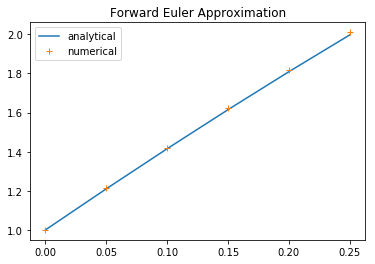

In [17]:
#d
import numpy as np
import matplotlib.pyplot as plt
times = np.arange(0,0.3,0.05)
exactVals = [ExactVal(t, 1,0) for t in times]
forward_euler = ForwardEuler(0,0.25,5,1)

plt.plot(times, exactVals)
plt.plot(times, forward_euler,'+')
plt.title("Forward Euler Approximation")
plt.legend(["analytical", "numerical"])

In [23]:
#e
def ImprovedEuler(t0, tfinal, N, y0):
    h = (tfinal - t0)/N
    t = t0
    yk = y0
    vector = [y0]
    for k in range(N):
        yk_temp = yk + h*Dynamics(t, yk)
        yk = yk + (h/2)*(Dynamics(t, yk) + Dynamics(t+h, yk_temp))
        t = t+h
        vector.append(yk)
    return vector

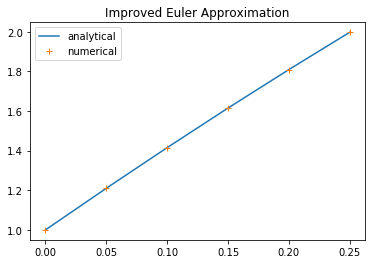

In [24]:
#f

times = np.arange(0,0.3,0.05)
exactVals = [ExactVal(t, 1,0) for t in times]
improved_euler = ImprovedEuler(0,0.25,5,1)

plt.plot(times, exactVals)
plt.plot(times, improved_euler,'+')
plt.title("Improved Euler Approximation")
plt.legend(["analytical", "numerical"])

In [25]:
#g
import pandas as pd

Ns = [5*(2**i) for i in range(9)]
i = [i for i in range(9)]
error = []
ratio = [None]
exact = ExactVal(0.25, 1,0)

for j in range(9):
    N = Ns[j]
    estimate = ForwardEuler(0, 0.25, N, 1)[-1]
    err = np.abs(exact - estimate)
    if j != 0:
        rat = err/error[-1]
        ratio.append(rat)
    error.append(err)
    

pd.DataFrame({"i":i, "error":error, "ratio":ratio})
    

,i,error,ratio
0,0,0.013505,NaN
1,1,0.006780,0.502056
2,2,0.003397,0.501023
3,3,0.001700,0.500511
4,4,0.000851,0.500255
5,5,0.000425,0.500127
6,6,0.000213,0.500064
7,7,0.000106,0.500032
8,8,0.000053,0.500016


The order of the Euler Forward  method appears to be 1, as h decreases by half, the error also reduces by a factor of 2. $\frac{1}{2^p} \approx 0.5 -> p \approx 1$ 

In [26]:
#h

Ns = [5*(2**i) for i in range(9)]
i = [i for i in range(9)]
error = []
ratio = [None]
exact = ExactVal(0.25, 1,0)

for j in range(9):
    N = Ns[j]
    estimate = ImprovedEuler(0, 0.25, N, 1)[-1]
    err = np.abs(exact - estimate)
    if j != 0:
        rat = err/error[-1]
        ratio.append(rat)
    error.append(err)
    

pd.DataFrame({"i":i, "error":error, "ratio":ratio})

,i,error,ratio
0,0,1.110391e-04,NaN
1,1,2.775319e-05,0.249941
2,2,6.937885e-06,0.249985
3,3,1.734446e-06,0.249996
4,4,4.336098e-07,0.249999
5,5,1.084023e-07,0.250000
6,6,2.710058e-08,0.250000
7,7,6.775145e-09,0.250000
8,8,1.693784e-09,0.250000


The order of the Euler Forward  method appears to be 2, as h decreases by half, the error reduces by a factor of 4.  $\frac{1}{2^p} \approx 0.25 -> p \approx 2$ 